<a href="https://colab.research.google.com/github/DanOliveira-DS/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Lisboa

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2019-09-27/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69675,-9.19840,Entire home/apt,36,3,16,2019-08-13,0.26,1,10
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,108,2019-08-29,1.63,1,324
2,28066,ear the birds,120855,Lucia,Azambuja,Aveiras de Cima,39.14654,-8.91503,Private room,53,1,0,NaN,NaN,1,365
3,29138,Room for rent in shared house,125304,Susana,Lisboa,Areeiro,38.73634,-9.13792,Private room,71,1,0,NaN,NaN,1,365
4,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,313,2019-09-18,2.94,1,354


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa com 35847 entradas e 106 variáveis (listings.csv.gz).

**Gosto de aplicar o metodo info, porque assim temos uma rapida leitura se existem dados ausentes e assim trata-los.**

In [0]:
# identificar o volume de dados do DataFrame
print(f"Variáveis:\t {df.shape[0]}")
print(f"Entradas:\t {df.shape[1]} \n")
print("-------------------------------------------------------")
# analisando informações do DataFrame
print("Informações:")
print(f"{df.info()} \n")

print("-------------------------------------------------------")
# verificar os tipos das entradas do dataset
print(f"Entradas:                            Tipos:\n\n{df.dtypes}")

Variáveis:	 25134
Entradas:	 16 

-------------------------------------------------------
Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 16 columns):
id                                25134 non-null int64
name                              25112 non-null object
host_id                           25134 non-null int64
host_name                         25126 non-null object
neighbourhood_group               25134 non-null object
neighbourhood                     25134 non-null object
latitude                          25134 non-null float64
longitude                         25134 non-null float64
room_type                         25134 non-null object
price                             25134 non-null int64
minimum_nights                    25134 non-null int64
number_of_reviews                 25134 non-null int64
last_review                       21585 non-null object
reviews_per_month                 21585 non-null float64
calcul

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Um passo importante na analise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.141203
last_review                       0.141203
name                              0.000875
host_name                         0.000318
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Com essa analise foi possivel verificar que:


*   As variáveis `reviews_per_month` e `last_review possuem` 14% de dados ausentes
*   As variáveis `name` e `host_name` têm aproximadamente 0,1%






### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar essa distribuição, uma boa ideia é plotar um histograma

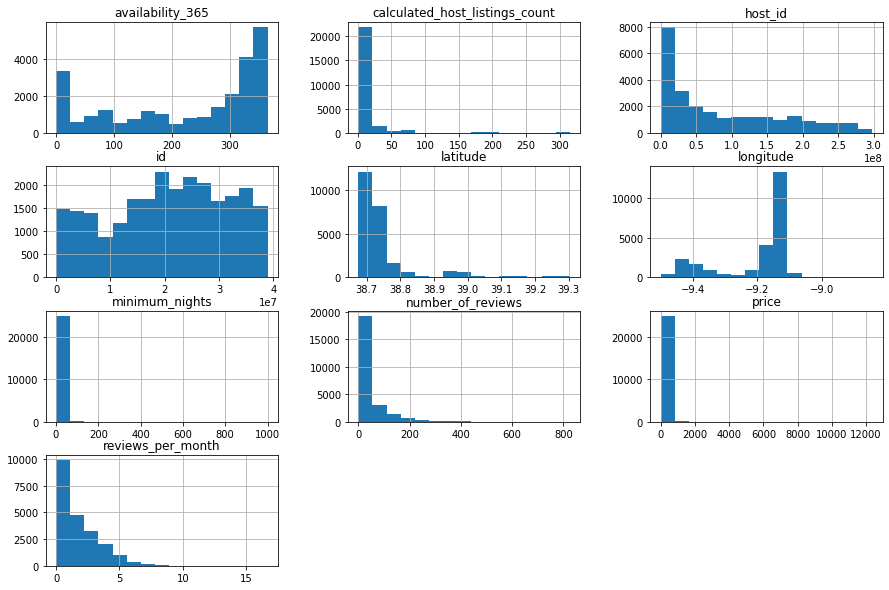

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights`, `number_of_ reviews` e  `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [0]:
#Utilizando o método describe
df[['price','minimum_nights','number_of_reviews','reviews_per_month',
    'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25134.000000,25134.000000,25134.000000,21585.000000,25134.000000,25134.000000
mean,97.947561,2.820761,39.300947,1.792857,15.723323,224.904074
std,195.577414,10.546084,60.806113,1.650918,42.860030,128.974513
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,48.000000,1.000000,2.000000,0.480000,1.000000,109.000000
50%,69.000000,2.000000,14.000000,1.300000,3.000000,279.000000
75%,100.000000,3.000000,50.000000,2.730000,10.000000,337.000000
max,12345.000000,1000.000000,825.000000,16.670000,315.000000,365.000000


Olhando o resumo estatístico acima, foi possível gerar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 100, entretanto seu valor máximo é 12345
* A quantidade mínima de noites(`minimum_nights`) está acima do limite real de 365 dias no ano

# Vamos plotar Boxplot para price e minimum_nights

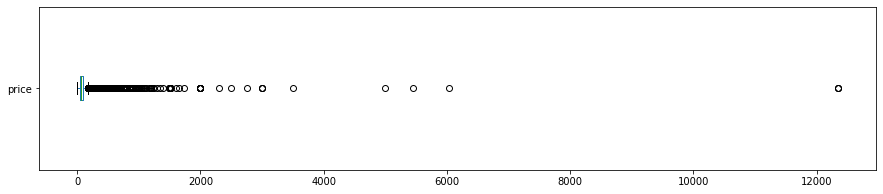


price: valores acima de 1300
54 entradas
0.21484841250895204 %


In [0]:
# price
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 1300 para price
print("\nprice: valores acima de 1300")
print(f"{len(df[df.price > 1300])} entradas")
print(f"{(len(df[df.price > 1300]) / df.shape[0])*100} %")

hi

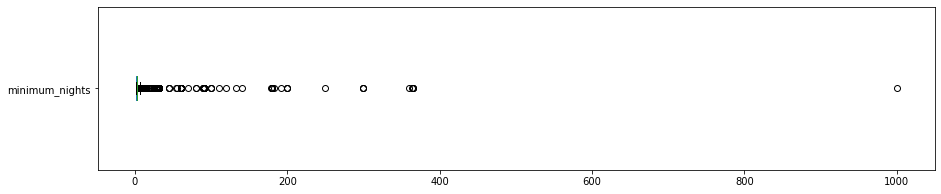

minimum_nights: valores acima de 30:
74 entradas
0.2944218986233787 %


In [0]:
# minimum_nights
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver  a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print(f"{len(df[df['minimum_nights'] > 30])} entradas")
print(f"{(len(df[df.minimum_nights > 30]) / df.shape[0])*100} %")


# Histogramas sem outliers
Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

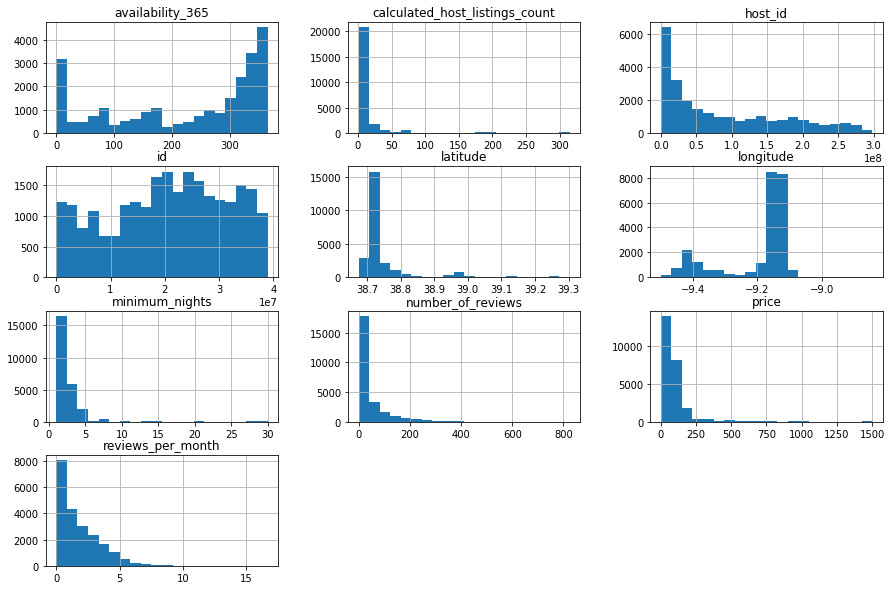

In [0]:
# removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variaveis numericas
df_clean.hist(bins=20, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price``
print(f"A media de preços é: {df['price'].mean()}")


A media de preços é: 97.94756107265059


### **Q4. Qual a correlação existente entre as variáveis**

Correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014995,-0.128026,-0.133961,-0.012835,0.037186
minimum_nights,-0.014995,1.000000,-0.048724,-0.143841,-0.032001,-0.021876
number_of_reviews,-0.128026,-0.048724,1.000000,0.627283,-0.097810,0.065897
reviews_per_month,-0.133961,-0.143841,0.627283,1.000000,-0.125604,0.018862
calculated_host_listings_count,-0.012835,-0.032001,-0.097810,-0.125604,1.000000,0.071923
availability_365,0.037186,-0.021876,0.065897,0.018862,0.071923,1.000000


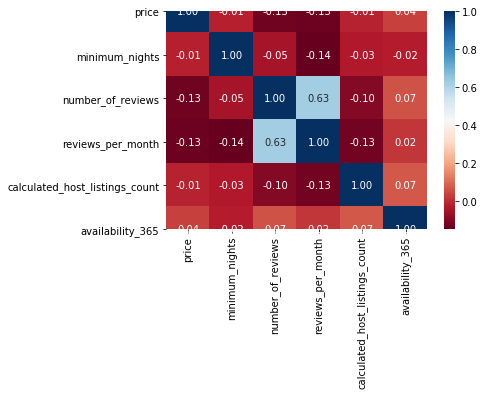

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    18261
Private room        5713
Hotel room           682
Shared room          380
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / df_clean.shape[0]

Entire home/apt    0.729390
Private room       0.228191
Hotel room         0.027241
Shared room        0.015178
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vermelha                                        292.500000
Cardosas                                        280.000000
Ota                                             259.000000
Aveiras de Baixo                                249.000000
Freiria                                         231.000000
Bucelas                                         169.000000
Almargem do Bispo, Pro Pinheiro e Montelavar    156.285714
So Domingos de Benfica                          151.774566
Vale do Paraso                                  150.000000
Alcabideche                                     145.721030
Name: price, dtype: float64

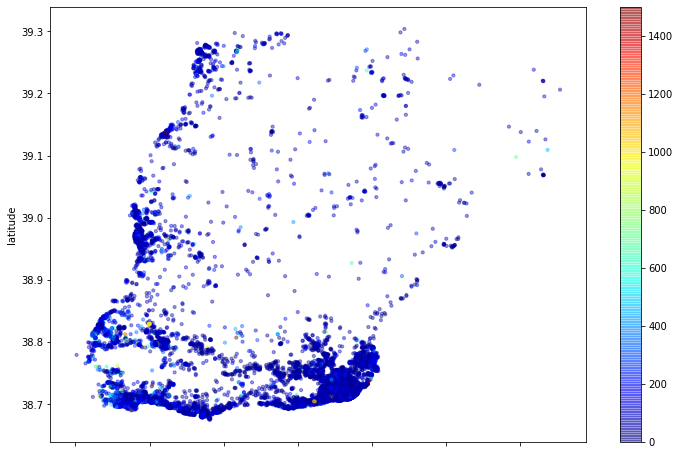

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4,
              c=df_clean['price'], s=10,cmap=plt.get_cmap('jet'),
              figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
print(f"A media de noites alugueis: {round(df_clean['minimum_nights'].mean(),2)}")

A media de noites alugueis: 2.44


## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, mas ja foi possivel ver um dataset com pouca presença de outliers, os imoveis mais alugados são em sua grande maioria os que oferecem o local todo.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

**Abaixo deixei um exemplo de como conseguir esses mesmo insights utilizando o pandas profiling, de uma forma mais interativa**

# Pandas Profiling

Deixo aqui uma outra forma de abordagem para analises iniciais, que é o uso do pandas-profiling


# O que é pandas-profiling?

Criado por Jos Polfliet, Simon Brugman, o pacote pandas-profiling é capaz de gerar relatorios HTML interativos a partir de um DataFrame do pandas. 

Para cada coluna, as seguintes estatísticas - se relevantes para o tipo de coluna - são apresentadas:

* **Essentials**: tipo, valores únicos, valores ausentes
* **Estatísticas quantílicas** como valor mínimo, Q1, mediana, Q3, máximo, intervalo, intervalo interquartil
* **Estatísticas descritivas** como média, modo, desvio padrão, soma, desvio absoluto médio, coeficiente de variação, curtose, assimetria
* **Valores mais frequentes**
* **Histograma**
* **Correlações** destacando variáveis altamente correlacionadas, matrizes de Spearman, Pearson e Kendall
* **Valores ausentes** matriz, contagem, mapa de calor e dendrograma dos valores ausentes


# Instalando a biblioteca pandas-profiling

In [0]:
!pip install pandas-profiling


In [0]:
# Importando a biblioteca pandas-profiling
import pandas_profiling

# Gerando o Profile Report

para gerar o profile report temos a seguinte sintaxe
`pandas_profiling.ProfileReport(inserir aqui seu DataFrame)`

**Obs: Ao rodar o codigo no Google Colab, achei que ele ficou muito desconfigurado, isso ja não acontece no ambiente do jupyter notebook**

Como ele tem a opção de você gerar um relatorio em html, para ser aberto em qualquer navegador achei melhor deixar so essa demonstração aqui.

Para gerar esse relatorio, primeiro precisamos atribuir `pandas_profiling.ProfileReport(inserir aqui seu DataFrame)` a uma variavel, no exemplo usei o nome profile e entao usar a função 
`.to_file(outputfile="nomeaqui.html")`

In [0]:
# criando profile report e atribuindo o mesmo a variavel profile
profile = pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
# no outputfile=" ", coloquei o nome de airbnbLisbon.html, mas voce pode o nome que quiser, mas sempre deixando a extensao .html
# gerando arquivo html
profile.to_file(outputfile="airbnbLisbon.html")

**Obs: o arquivo vai ficar salvo dentro da pasta, é possivel fazer o download do mesmo clicando com o botão direito, e abrir em uma outra aba, coloquei um foto abaixo mostrando o passo a passo**


In [0]:
from IPython.display import Image

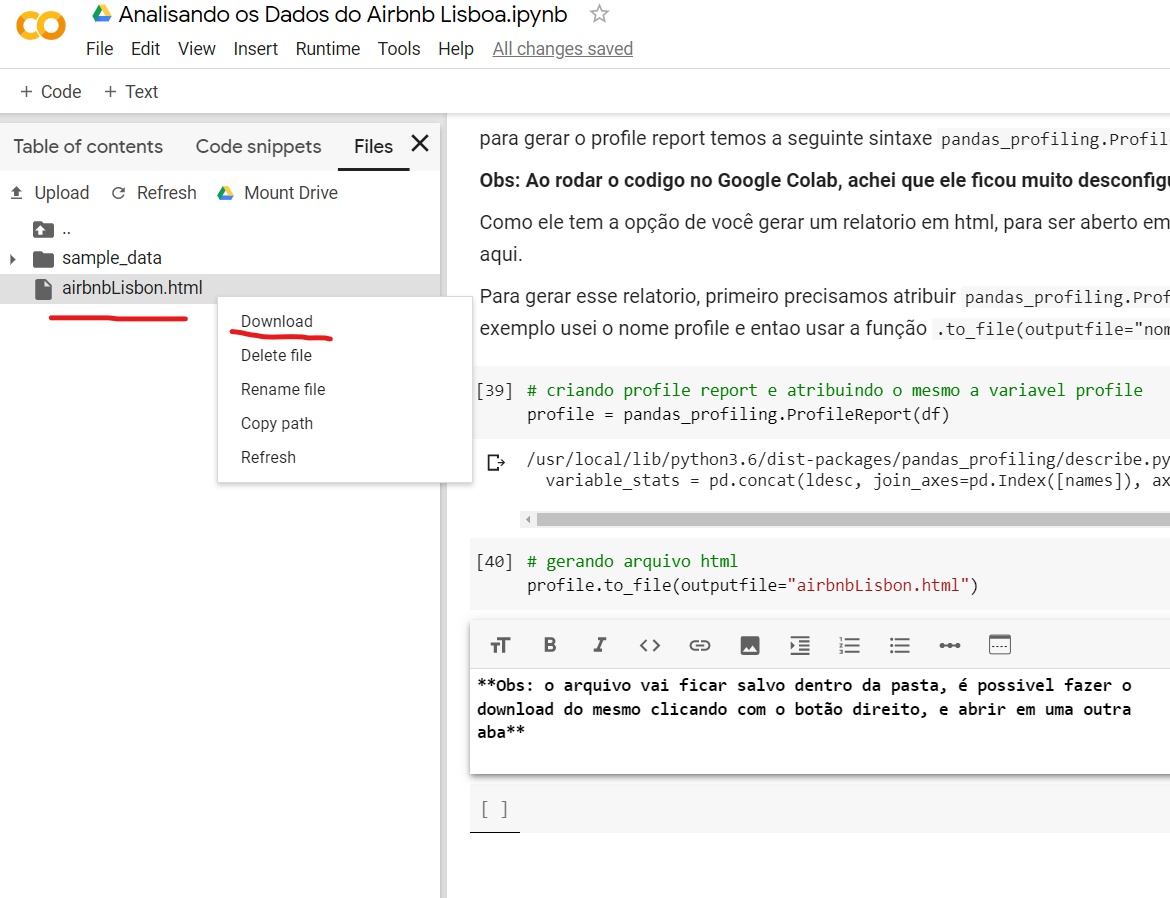

In [0]:
Image('expandasprofiling.png', width=800, height=500)